In [1]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.metrics.pairwise import euclidean_distances
import sys
sys.path.append("T:/laupodteam/AIOS/Chontira/CellDynClustering")
from evaluation.fast_dunn_index import dunn_fast


def cluster_plotting(data, feature_1, features_2, clusters, title):
    
    sns.scatterplot(data= data, x = feature_1, y = features_2, 
                hue = clusters, palette="deep").set_title(title)
    plt.show()


## Make toy clusters (Difference inter-cluster distances)

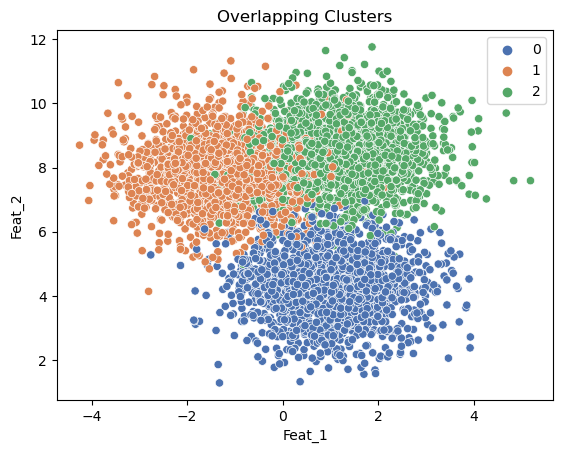

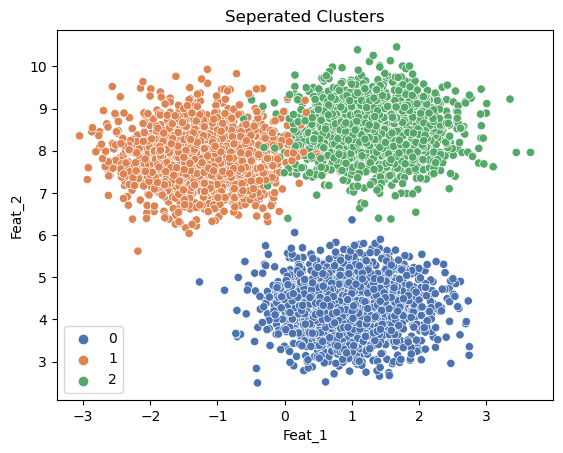

In [20]:

"""
Make toy cluster set for testing 
Varible cluster_std or cluster standard (make_blob function from sklearn)
control the spread of the clusters and how far apart they are in this case.
Random state 0
"""

col_names = ["Feat_1", "Feat_2", "Feat_3", "Feat_4", "Feat_5", "Feat_6"]
dense_features, dense_clusters = make_blobs(n_samples = 5000, cluster_std=1, 
                                        n_features = 6, centers = 3, random_state = 0)

df_dense = pd.DataFrame(dense_features, 
                  columns = col_names)

df_dense["labels"] = dense_clusters

df_dense.to_csv("T:/laupodteam/AIOS/Chontira/CellDynClustering/data/toy_dense.csv",index=False)
loose_features,loose_clusters = make_blobs(n_samples=5000, n_features = 6, centers = 3, 
                                           cluster_std=0.6, random_state = 0) 

df_loose = pd.DataFrame(loose_features, 
                  columns = col_names)
df_loose["labels"] = loose_clusters  
df_loose.to_csv("T:/laupodteam/AIOS/Chontira/CellDynClustering/data/toy_seperated.csv",index=False)
"""
Plot the toy cluster 
"""

cluster_plotting(df_dense, "Feat_1", "Feat_2",dense_clusters,"Overlapping Clusters" )

cluster_plotting(df_loose, "Feat_1", "Feat_2",loose_clusters,"Seperated Clusters" )


In [7]:
np.transpose(dense_clusters).shape

(5000,)

In [10]:
np.asarray(dense_clusters).shape

(5000,)

## Testing clusters with Sihouette score and Davies-Bouldin index from Sklearn

In [54]:
def clusters_scoring(data, clusters, sample_size = 5000, name = "", verbose=False):
    
    sil = metrics.silhouette_score(X = data, labels = clusters, sample_size = sample_size)
    
    db = metrics.davies_bouldin_score(X = data, labels = clusters)
    
    if(verbose): 
        print("Scores for {} clusters Sihouette: {} and  Davies-Bouldin index: {} ".format(name,sil, db))
    
    return sil, db

clusters_scoring(dense_features, dense_clusters, name = "dense", verbose = True)
clusters_scoring(loose_features, dense_clusters, name = "loose", verbose = True)




Scores for dense clusters Sihouette: 0.7561808663805396 and  Davies-Bouldin index: 0.35283606736294293 
Scores for loose clusters Sihouette: 0.8513327344641403 and  Davies-Bouldin index: 0.21178849943448433 


(0.8513327344641403, 0.21178849943448433)

## Exploring K-mean clustering with tuning of sample size. Evaluated by Silhouette score

In [105]:
cluster_num = 6
init = 'k-means++'
dimension = [2,3,4,5,6]
sample_size = [500, 1000,2000,4000,len(dense_features)]

def sample_size_tuning(data, sample_size):
    
    kmeans = KMeans(n_clusters=cluster_num, init = init).fit(data)
    
    mean_scores = []
    
    for size in sample_size:
        
        sils = []
        times = []
        
        
        for i in range(5):
            
            start = time.time()
            sils.append(metrics.silhouette_score(X = data, labels = kmeans.labels_, sample_size = size))
            times.append(time.time()-start)
            
        mean_scores.append([size, np.mean(sils), np.mean(times)])
        
    return np.asarray(mean_scores)
    

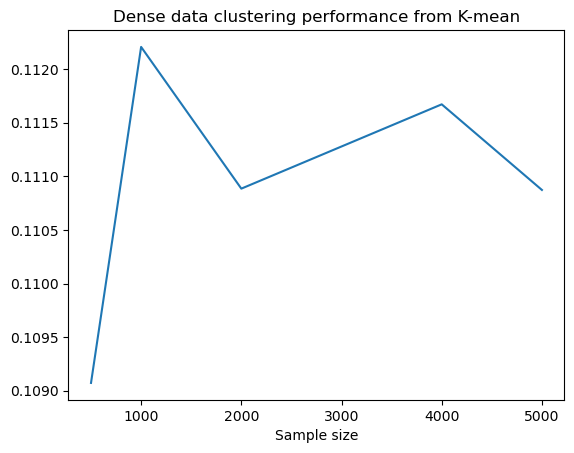

In [99]:
mean_sils = sample_size_tuning(dense_features, sample_size)
plot = sns.lineplot(x=mean_sils[:,0], y = mean_sils[:,1])
plot.set_title("Dense data clustering performance from K-mean")
plot.set_xlabel("Sample size")
plt.show()


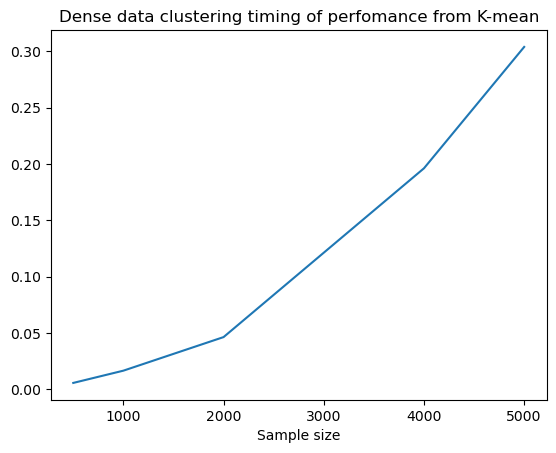

In [98]:
mean_sils = sample_size_tuning(dense_features, sample_size)
plot = sns.lineplot(x=mean_sils[:,0], y = mean_sils[:,2])
plot.set_title("Dense data clustering timing of perfomance from K-mean")
plot.set_xlabel("Sample size")
plt.show()

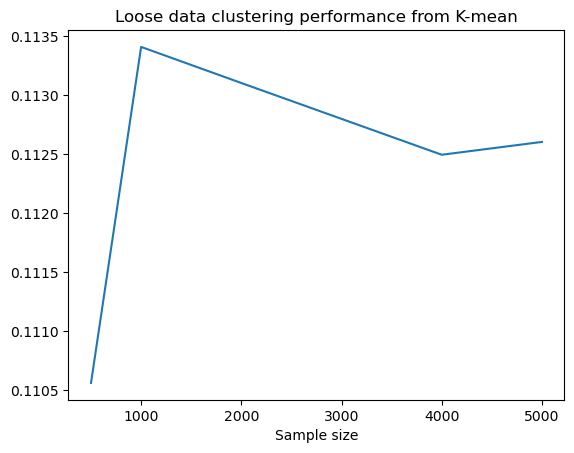

In [100]:
mean_sils = sample_size_tuning(loose_features, sample_size)
plot = sns.lineplot(x=mean_sils[:,0], y = mean_sils[:,1])
plot.set_title("Loose data clustering performance from K-mean")
plot.set_xlabel("Sample size")
plt.show()


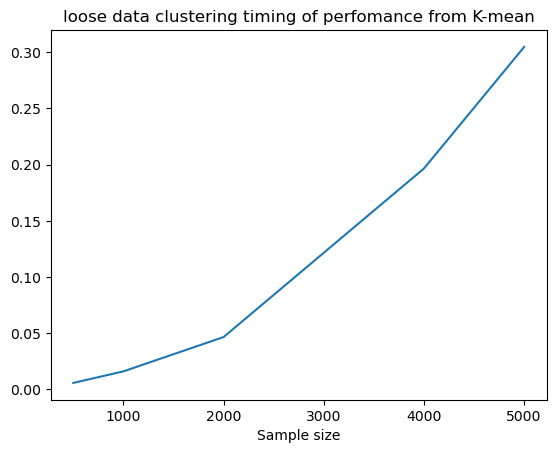

In [102]:
mean_sils = sample_size_tuning(loose_features, sample_size)
plot = sns.lineplot(x=mean_sils[:,0], y = mean_sils[:,2])
plot.set_title("loose data clustering timing of perfomance from K-mean")
plot.set_xlabel("Sample size")
plt.show()

## Exploring clustering performance with true labels (seperated clusters)

In [104]:
sample_size = [500, 1000,2000,4000,len(dense_features)]

def sample_size_tuning_with_labels(data, labels, sample_size):
    
    
    
    mean_scores = []
    
    for size in sample_size:
        
        sils = []
        times = []
        
        
        for i in range(5):
            
            start = time.time()
            sils.append(metrics.silhouette_score(X = data, labels =labels, sample_size = size))
            times.append(time.time()-start)
            
        mean_scores.append([size, np.mean(sils), np.mean(times)])
        
    return np.asarray(mean_scores)

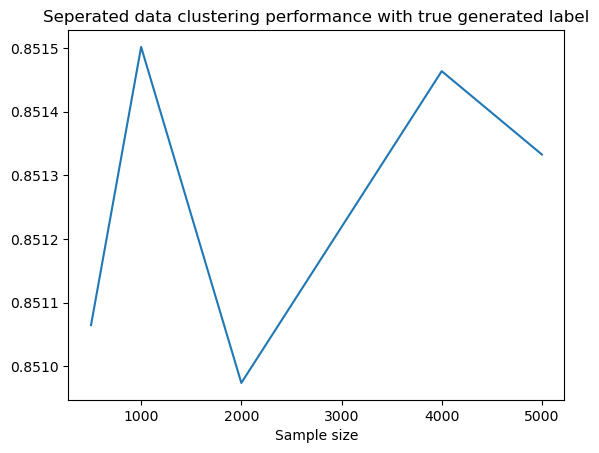

In [108]:
mean_sils = sample_size_tuning_with_labels(loose_features, loose_clusters, sample_size)
plot = sns.lineplot(x=mean_sils[:,0], y = mean_sils[:,1])
plot.set_title("Seperated data clustering performance with true generated label")
plot.set_xlabel("Sample size")
plt.show()


 ##  Dunn index exploration

In [7]:
dunn_fast(dense_features, dense_clusters)

0.5899299187149988